In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [80]:
#loading the data
cocola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")


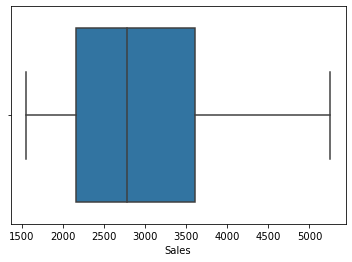

In [81]:
# Boxplot for ever
sns.boxplot("Sales",data=cocola)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


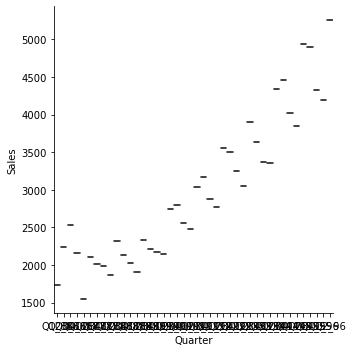

In [82]:
sns.factorplot("Quarter","Sales",data=cocola,kind="box")


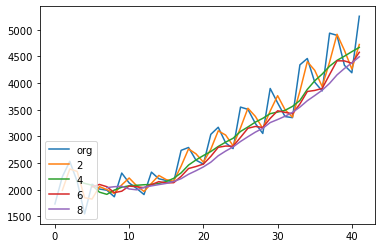

In [83]:
# moving average for the time series to understand better about the trend character in Amtrak
cocola.Sales.plot(label="org")
for i in range(2,10,2):
    cocola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [88]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(cocola.Sales,model="additive")
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(cocola.Sales,model="multiplicative")
decompose_ts_mul.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [87]:
# Amtrak.index.freq = "MS" 
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 

Train = cocola.head(48)
Test =cocola.tail(12)

In [89]:
# to change the index value in pandas data frame 
Test.set_index(np.arange(1,13),inplace=True)

In [90]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [91]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


50.41280264315921

In [92]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) # 9.82

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


49.17656573369126

In [93]:

# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)# 3.10

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb


49.136204037170984

In [94]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) # 2.35


50.22773207452062

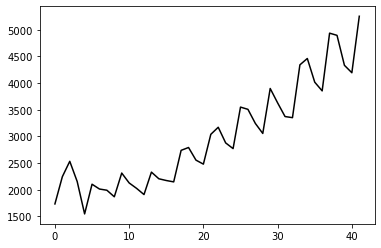

In [95]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")


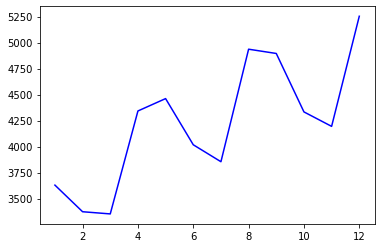

In [96]:
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")

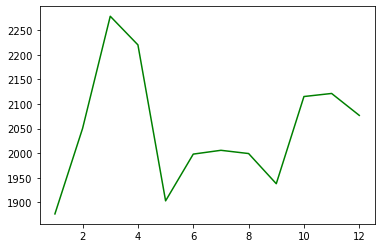

In [97]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")


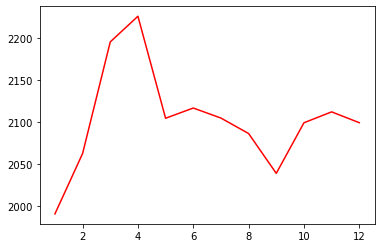

In [98]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")


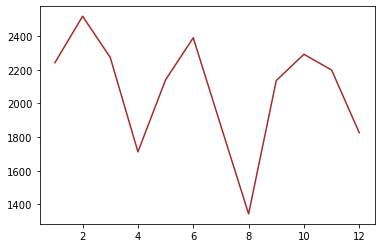

In [99]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")


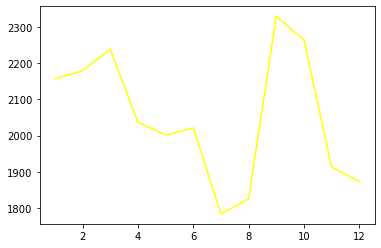

In [100]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")


No handles with labels found to put in legend.


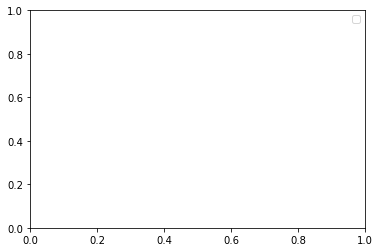

In [101]:
plt.legend(loc='best')